<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span><ul class="toc-item"><li><span><a href="#Model-Construction:-Motor-Rigid-Shaft-Load" data-toc-modified-id="Model-Construction:-Motor-Rigid-Shaft-Load-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Model Construction:</em> Motor-Rigid Shaft-Load</a></span></li></ul></li><li><span><a href="#Controller-Design:-Block-Diagram" data-toc-modified-id="Controller-Design:-Block-Diagram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><em>Controller Design:</em> Block Diagram</a></span></li><li><span><a href="#Controller-Design:-Root-Locus-Sketch" data-toc-modified-id="Controller-Design:-Root-Locus-Sketch-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><em>Controller Design:</em> Root Locus Sketch</a></span></li><li><span><a href="#Controller-Design:-Select-Gains-Using-the-Root-Locus" data-toc-modified-id="Controller-Design:-Select-Gains-Using-the-Root-Locus-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><em>Controller Design:</em> Select Gains Using the Root Locus</a></span><ul class="toc-item"><li><span><a href="#Arduino-Code-Update" data-toc-modified-id="Arduino-Code-Update-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Arduino Code Update</a></span></li></ul></li><li><span><a href="#Controller-Validation:" data-toc-modified-id="Controller-Validation:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><em>Controller Validation:</em></a></span></li><li><span><a href="#Controller-Design:-PD-Control-of-Position" data-toc-modified-id="Controller-Design:-PD-Control-of-Position-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><em>Controller Design:</em> PD Control of Position</a></span></li></ul></div>

[IMPLEMENTATION RESOURCES](https://sabatind.github.io/ME480_Resources/)


## Challenge

Having seen some of the limitations of using P control on a system that can be modeled with a 1st order plant transfer function, you are now being asked to explore closed loop performance for a similiar system.  However, now you will need to control two different characteristics of the system response as well as consider outputs other than velocity.  You have the knowledge to address this additional requirement, but it will require you to increase the complexity of your controller.  

For this challenge you system will be the **MOTOR-RIGID SHAFT-LOAD** configuration of your inertia module and the controller specifications are listed below:

* A **velocity controller** that will produce a settling time 2 times faster than the open loop system with slowest eigenvalues (or the "dominant" eigenvalue pair) producing a damping ratio of 0.707


* An **angular position controller** that can achieve $\zeta=0.1$ and $\omega_n=25~rad/s$  for the dominant eigenvalue pair



# Workstation Configuration

For this lab, you will be using the motor connected to the load inertia via the **RIGID** shaft by using the brass coupler INSTEAD of the spring. 

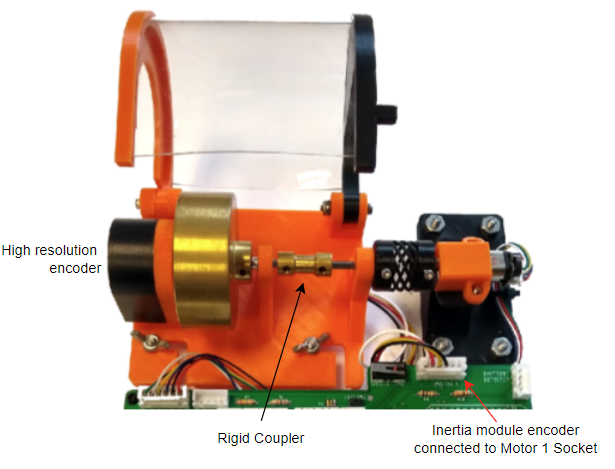

You will again be able to use a HIGH RESOLUTION encoder to capture this data so filtering of the data will not be needed.  The encoder on this module has 1000 segments/revolution and it uses quadrature encoding as discussed in [Lab 3](../Lab_3/Lab_3.ipynb#Measuring-Motor-Position).  You'll need to use both pieces of information to determine the number of counts/revoltion you'll read using the ME480FSM library.

**Confirm the encoder is connected to the Motor1 socket and you are using the appropriate library function.  Check your connections, function calls, and conversion factor are correct by ensuring 1 rotation reports the expected number of counts before taking data!**

### *Model Construction:* Motor-Rigid Shaft-Load

Capture the velocity response of your system to a step input starting from a nonzero velocity as you did in [Lab 4](../Lab_4/Lab_4.ipynb#Model-Construction:-Motor-Alone).  **Keep your voltage UNDER 4 VOLTS**.  This encoder's resolution is so high, that if you run at 5V the arduino will not be able to keep up with the change in counts! 

**Represent your model in transfer function form.  Use the Octave/Matlab `step()` command to calculate the predicted response of your model.** 

* **Display your transfer function using the [minreal()](https://www.mathworks.com/help/control/ref/lti.minreal.html) command to ensure it is in simplified form.**
* **Plot the model response and data on the same plot with appropriate labels and legend.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

## *Controller Design:* Block Diagram

You will be using a PI controller on velocity to address the first challenge.

**Explain below why would you select a proportional-integral controller for this application.**

YOUR ANSWER HERE

**Sketch the block diagram for PI control of velocity for this system and show the development of the relevant transfer functions needed for root locus analysis.**  

You may leave all equations in algebraic form. There is no need to substitute numerical values.

YOUR ANSWER HERE
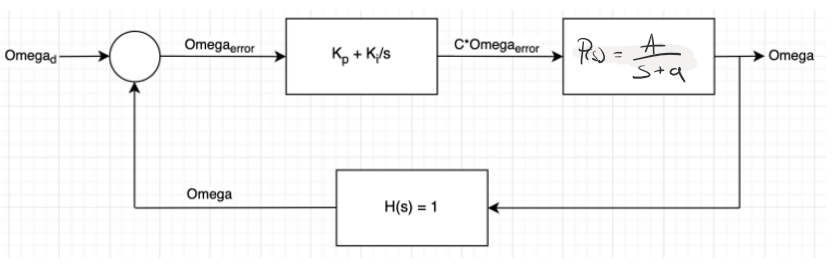

## *Controller Design:* Root Locus Sketch

Using the Octave/Matlab rlocus command make some plots of the root locus for different values of the **ZERO** in your open loop transfer function. Adjust the value of the zero to achieve two different cases: 

1. **For case 1, select a control zero such that the closed loop response will never oscillate.**
2. **For case 2, place the control zero such that oscillatory behavior is possible.**

Include a simple hand sketch for each case below.  

YOUR ANSWER HERE
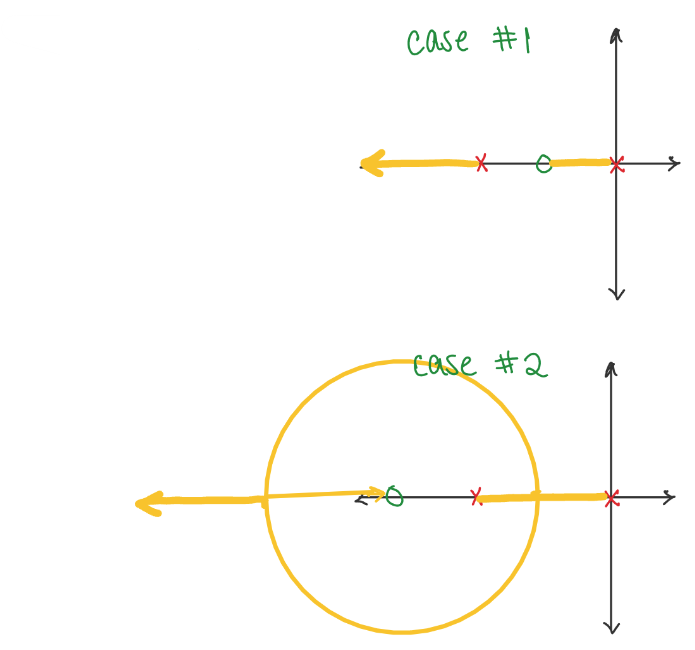

**Explain what range of zero locations you would consider for the design requirements listed in the [Challenge](#Challenge) and why.**

YOUR ANSWER HERE

## *Controller Design:* Select Gains Using the Root Locus 

In order to design your controller, you will use the root locus plot of your plant under PI control to determine your gains.  

With more than one variable unkown, it will take a few iterations to estimate your controller's gains. This is best done in MATLAB as it has capability that isn't duplicated in Jupyter.

* Plot your target eigenvalue on the root locus plot by using ```hold on``` and a simple plot command to place a symbol at the proper real and imaginary coordinates.
* Using the *Data Tips* in MATLAB (you can't do this within the Jupyter notebook), you can see the details of any point on your root locus.  You can "slide" the data tip along the root locus to see the eigenvalues associated with different gain valus.  Find a gain that matches the target eigenvalue.

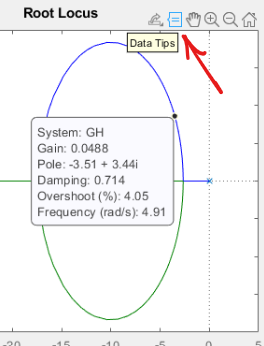


* If your root locus does not intersect the target eigenvalue, you will have to change the value for the controller zero and replot.

**INCLUDE IN THE CODE CELL BELOW:**
* **Your FINAL root locus plot confirming it passes through your target eigenvalue** ***that is also plotted*** **on the same graph**
* **From the root locus gain, calculate your controller gains $k_p$, $k_i$, and $k_{sum}$.  Display them as outputs of your code**.
* **Plot the predicted step response of the model as a feasibility check that your design predicts the desired settling time and oscillatory response**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

### Arduino Code Update

Beginning with the code you used for your P controller in Lab 4, make a copy of the code and add the calculation of the integral of the error for inclusion in your control law.

<font color = "white">.</font>
<font size = 3>
$u = k_{sum}(k_p  e + k_i \int{e})$
</font>

Since you do not have a continuous error function (your error function has values only at descrete time steps) you will need to estimate the integral numerically.  You can again use [Euler Integration](../W03B_Nonlinear_Numerical/W03B_Modeling_Nonlinear_Numerical.ipynb#Approximate-Integration:-Euler's-Method) to do this.

**Include in the cell below a copy of your completed Arduino code, properly formatted**

YOUR ANSWER HERE

## *Controller Validation:* 

* After modifying the arduino code and inputting your calculated gains, run the motor with the rigid shaft and load in a step response test.
* Set the initial velocity to be just large enough to run the motor smoothly (Do you know why?  If not, be sure to ask!).
* Set the required step velocity being careful to check that the arduino pwm output is ***STRICTLY LESS THAN*** 5V.  If you request a voltage higher than 5V the motor will only see 5V (as that is the limit of your power supply).  This will introduce a non-linearity into your system and make your model innacurate.  

**In the code cell below, compare your predicted response of your closed loop system to the measured response.**  
* **Plot the predicted control signal (u) vs. measured to confirming you did not "saturate" the H-Bridge output.** 
* **Also plot the predicted velocity from your closed loop transfer function model vs the measured velocity**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**In the cell below, summarize the comparison.  Comment on your expectations for the modeled closed loop behavior and the closed loop behavior you observed.  Does the dominant behavior of the real system agree with your predictions under closed loop control?**

YOUR ANSWER HERE

## *Controller Design:* PD Control of Position

Although your plant transfer function has angular velocity as the output, you can modify it so that it outputs position simply by adding an integrator in series.  The block diagram for PD control of your velocity transfer function modified with an integrator is shown below.

Notice that $H = 1$ in the diagram.  This implies you will be able to directly measure the position of the motor shaft.  

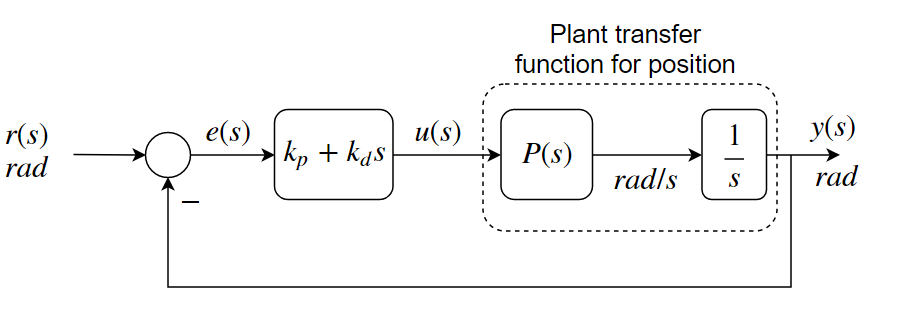

**Why would you chose a PD controller for this application instead of a PI controller like you used to control velocity?**

YOUR ANSWER HERE

# *Controller Design:* 

**Using the Octave cell below, plot root loci of your plant under PD control that is capable of meeting the closed loop design requirements.**
 
* **Plot your final root locus plot that confirms the root locus passes through the plotted target eigenvalue as you did above for your PI controller.  Use Matlab to iterate on your zero location and to find the gain $K$ that corresponds to the target eigenvalue.**
* **From the root locus gain, calculate your controller gains $k_p$, $k_d$, and $k_{sum}$.  **Display them as outputs of your code along with the root locus plot with the target eigenvalue**. 
* **Plot the predicted step response of the model as a feasibility check that your design predicts the desired settling time and oscillatory response**

NOTE: The target damping ratio is VERY low.  If you cannot achieve a feasible design at $\zeta = 0.1$ you can increase the damping ratio.  You should be able to achieve  $\zeta < 0.15$

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

#  *Controller Validation:* Adding Derivative Control to Arduino Code

You will need to add the derivative of the error to your control law to implement PD control

$ u=k_{sum}(k_p e+k_d \frac{de}{dt})$ 

Like you did with the integrator, you will need to determine a numerical approximation of the derivative of error that gets updated each time through the void loop() function of your Arduino code.  To achieve this you can use the same type of Euler approximation you have been using to calculate the angular velocity of the motor!

You will also need to update the code to reflect your closed loop system is now using **angular position** as an input and output.
* Update the initial input and step input to reflect that you are asking for a position in radians
* Update the calculation of system output to reflect it is now angular position in radians

**TIP:** You will also need to handle the fact that your controller will be providing inputs to the motor to run in the positive and negative direction (POSITIVE and NEGATIVE voltage inputs). You have a couple of choices on how to address this:
* You could use an `if` statement that uses the sign of the voltage to determine which H-Bridge pins are being turned on/off using the `analogWrite()` command.
* You could make use of the [ME480 FSM library](https://alexanderallenbrown.github.io/ME480FSM/index.html) `motor2` function which allows you to run the motor similarly to the Zumo library command with inputs that range from -255 to +255 to allow for direction control.

**Include in the cell below a copy of your properly formatted Arduino code.**

YOUR ANSWER HERE

# *Controller Validation:* PD Control of Motor-Shaft-Load

* After modifying the arduino code and inputting your calculated gains, run the motor with the rigid shaft and load.
* Set the position step such that the pwm output signal is ALWAYS ***LESS THAN*** 255 counts. If this maximum is reached then the system will have non-linear characteristics that are not included in your model.
* Record the response to your step input by outputting the position and other relevant parameters to the serial monitor. 

**In the MATLAB cell below, compare the data to the predicted response for the following quantities:**
* **Proportional control signal**
* **Derivative control signal**
* **Total control signal**
* **Angular position**    

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

In the cell below, summarize the comparison of simulation and data.  Considering the behaviors you have seen with this electromechanical system and tried to model, describe any discrepencies and your best understanding of their source OR questions you have about them.

YOUR ANSWER HERE